In [ ]:
from pysdkit import MVMD
import numpy as np
import matplotlib.pyplot as plt
import random as rd

i = rd.randint(0, 9999)
data = np.load('sim_data.npy')[i]
denoise_data = data[1]
data = data[0]
print(data.shape)

(32, 1024)


In [122]:
def zscore(x):
    return (x - np.mean(x)) / np.std(x)

In [123]:
alpha = 2000
k = 20
tau = -0.1
mvmd = MVMD(alpha, k, tau)
modes = mvmd(data)

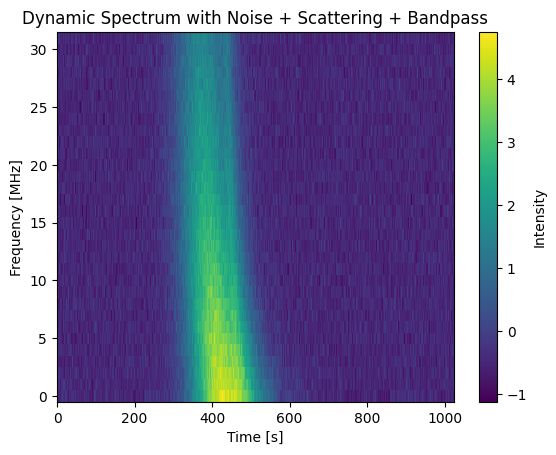

In [124]:
time = np.linspace(0, 32, 1024)
plt.imshow(data, aspect='auto', interpolation='nearest', origin='lower')
plt.ylabel("Frequency [MHz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Intensity")
plt.title("Dynamic Spectrum with Noise + Scattering + Bandpass")
plt.show()

In [125]:
final_data = np.zeros((1024, 32)) 
for _ in range(k):
    final_data += modes[_]

final_data = final_data.T
signal_min = final_data.min()
signal_max = final_data.max()
final_data = (final_data - signal_min) / (signal_max - signal_min)

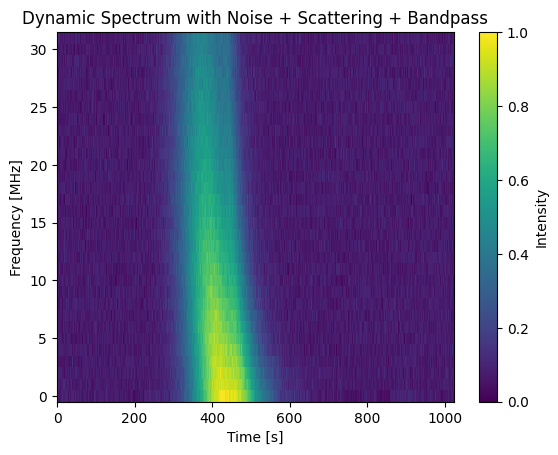

In [126]:
time = np.linspace(0, 32, 1024)
plt.imshow(final_data, aspect='auto', interpolation='nearest', origin='lower')
plt.ylabel("Frequency [MHz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Intensity")
plt.title("Dynamic Spectrum with Noise + Scattering + Bandpass")
plt.show()

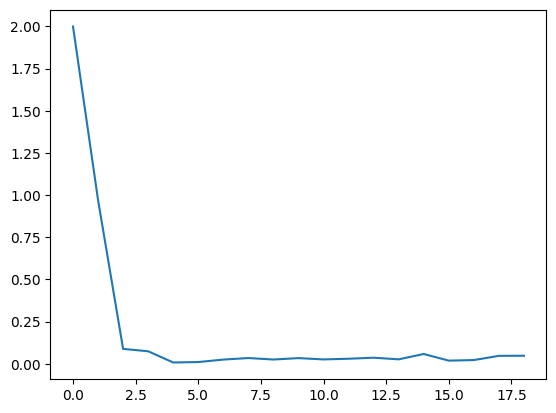

In [127]:
U, s, Vh = np.linalg.svd(modes)
kur = np.array([])
for u in modes:
    x = u.flatten()
    mean_x = np.mean(x)
    numerator = 32768 * np.sum((x - mean_x)**4)
    denominator = (np.sum((x - mean_x)**2))**2
    k = numerator / denominator 
    kur = np.append(kur, k)
k_min, k_max = np.min(kur), np.max(kur)
kur = (kur - k_min) / (k_max - k_min)
min_len = min(len(kur), len(s[0])) - 1
s[0] = (s[0] - np.min(s[0])) / (np.max(s[0]) - np.min(s[0])) 
crit = kur[:min_len] + s[0][:min_len]
plt.plot(crit)
plt.show()
plt.close()

In [128]:
j = 0
while crit[j] - crit[j + 1] > 0.0001:
    j += 1

final_data = np.zeros((1024, 32)) 
for _ in range(j):
    final_data += modes[_]

final_data = final_data.T
final_data = zscore(final_data)

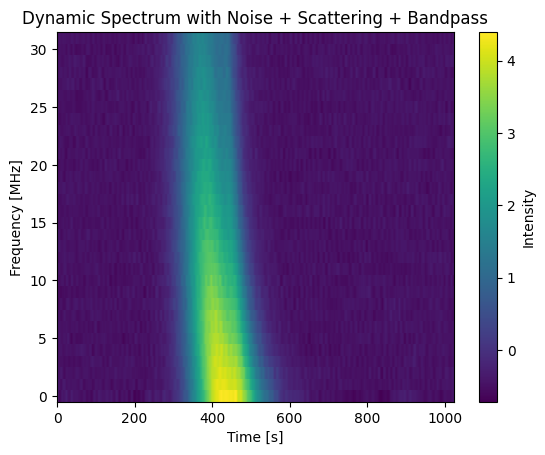

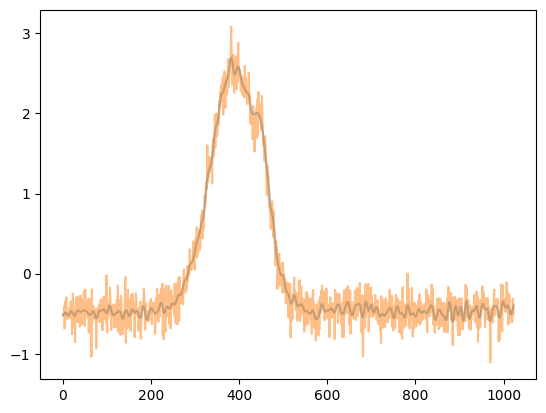

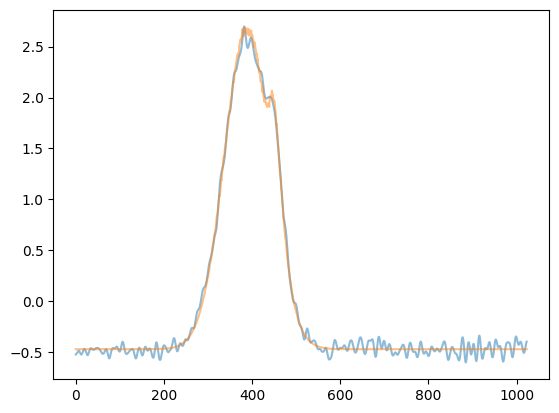

In [129]:
time = np.linspace(0, 32, 1024)
plt.imshow(final_data, aspect='auto', interpolation='nearest', origin='lower')
plt.ylabel("Frequency [MHz]")
plt.xlabel("Time [s]")
plt.colorbar(label="Intensity")
plt.title("Dynamic Spectrum with Noise + Scattering + Bandpass")
plt.show()
plt.plot(final_data[16], alpha=0.5)
plt.plot(data[16], alpha=0.5)
plt.show()
plt.plot(final_data[16], alpha=0.5)
plt.plot(denoise_data[16], alpha=0.5)
plt.show()